In [26]:
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
X_train = df_train.iloc[:, 1:]/255
X_test = df_test.iloc[:, 1:]/255

In [19]:
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [21]:
X = tf.placeholder(tf.float32, shape = (None, 784))
y = tf.placeholder("int32", shape=(None,))

y_oh = tf.one_hot(y, depth=10) # depth = number of classes

W = tf.Variable(tf.truncated_normal((784, 10), stddev=0.1))
b = tf.Variable(tf.zeros((10,)))
print("X", X)
print("y", y)
print("y_oh", y_oh)
print("W", W)
print("b", b)

logits = tf.matmul(X, W) + b

y_pred = tf.argmax(logits, axis=1, output_type=tf.int32)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh
                                    , logits=logits)

cost = tf.reduce_mean(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y), tf.float32))
print("accuracy", accuracy)

optimizer = tf.train.AdamOptimizer(learning_rate = 1e-3).minimize(cost)

max_iterations = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {X: X_train, y: y_train}
    scores = []
    for i in range(max_iterations):
        cost_, optimizer_, accuracy_ = sess.run([cost, 
                        optimizer, accuracy], feed_dict=values)
        print(cost_, accuracy_)
        scores.append(cost_)

X Tensor("Placeholder_21:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_22:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot_7:0", shape=(?, 10), dtype=float32)
W <tf.Variable 'Variable_17:0' shape=(784, 10) dtype=float32_ref>
b <tf.Variable 'Variable_18:0' shape=(10,) dtype=float32_ref>
accuracy Tensor("Mean_11:0", shape=(), dtype=float32)
2.5090196 0.1212
2.4376307 0.13176666
2.3710034 0.14588334
2.309056 0.16183333
2.2515507 0.18135
2.1981397 0.20221667
2.1483963 0.2262
2.101838 0.25216666
2.0579772 0.27825
2.0163572 0.3039
1.9765637 0.32898334
1.9382565 0.35231668
1.9011668 0.37343332
1.8650928 0.39428332
1.829893 0.41541666
1.7954789 0.43515
1.7618035 0.45371667
1.7288499 0.47305
1.6966175 0.49085
1.6651175 0.5074
1.6343714 0.52423334
1.604393 0.53896666
1.5751991 0.55401665
1.5467963 0.56773335
1.5191932 0.58085
1.4923879 0.59363335
1.4663724 0.6052833
1.4411396 0.61675
1.4166769 0.62775
1.392963 0.63673335
1.3699872 0.64571667
1.3477308 0.65461665
1.3261704 0.6634167
1

In [6]:
a = (None,)
type(a)

tuple

Text(0,0.5,'Cost')

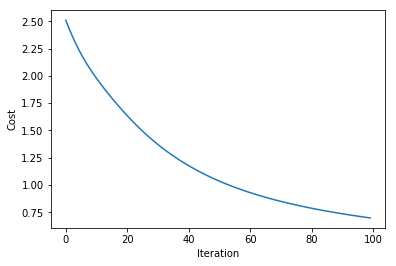

In [27]:
pd.Series(scores).plot()
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [28]:
import keras

Using TensorFlow backend.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784,), dtype="float32"))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile("adam", metrics=["accuracy"]
    , loss=keras.losses.categorical_crossentropy)
model.summary()
model.fit(X_train, keras.utils.to_categorical(y_train)
          , epochs=10
          , validation_data= (X_test, keras.utils.to_categorical(y_test))
         )



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.2092 - acc: 0.9387 - val_loss: 0.1050 - val_acc: 0.9669
Epoch 2/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0843 - acc: 0.9738 - val_loss: 0.0894 - val_acc: 0.9714
Epoch 3/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0567 - acc: 0.9829 - val_loss: 0.0662 - val_acc: 0.9785
Epoch 4/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0397 - acc: 0.9870 - val_loss: 0.0689 - val_acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0840 - val_acc: 0.9741
Epoch 6/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0229 - acc: 0.9922 - val_loss: 0.0676 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0199 - acc: 0.9936 - val_loss: 0.